# Introducción al Aprendizaje Automatizado

## Trabajo Práctico Final - Redes Convolucionales

## Inés Cipullo

### 2023

## Ejercicio 1
Se entrena una red convolucional sobre el dataset CIFAR-10, se grafican los errores de entrenamiento y de validación, y se imprime el error sobre el conjunto de test del modelo final.

170498071/170498071 [==============================] - 9s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 15, 15, 64)        18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 15, 15, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                       

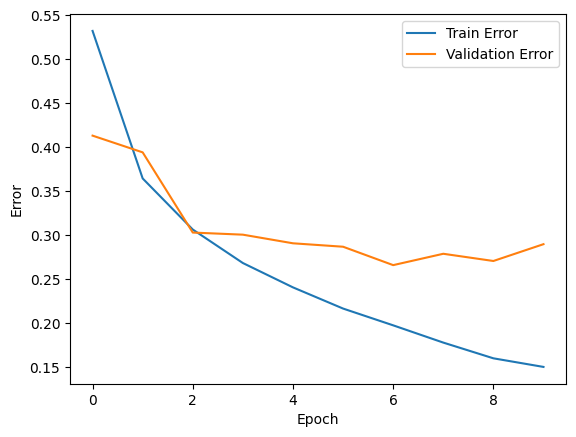

313/313 - 9s - loss: 0.9917 - accuracy: 0.7100 - 9s/epoch - 30ms/step
El valor de error sobre test del modelo final es: 0.2900000214576721


In [ ]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Se normalizan los valores de los pixeles (pasan a estar entre 0 y 1)
train_images, test_images = train_images / 255.0, test_images / 255.0

# Creación del modelo convolucional
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.Flatten())
model.add(layers.Dense(64))
model.add(layers.Dense(128))
model.add(layers.Dense(128))
model.add(layers.Dense(10))

model.summary()

# Compilación y entramiento del modelo
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

epochs = 10
history = model.fit(train_images, train_labels, epochs=epochs, validation_data=(test_images, test_labels))

# Evaluación del modelo obtenido
plt.plot((np.ones(epochs) - history.history['accuracy']), label='Train Error')
plt.plot((np.ones(epochs) - history.history['val_accuracy']), label = 'Validation Error')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend()
plt.show()

_, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print(f"El valor de error sobre test del modelo final es: {1 - test_acc}")

## Ejercicio 2
Se entrenan redes convolucionales iguales a la del ejercicio anterior, pero agregando Dropout de dos maneras: el primer modelo con una capa dropout luego de la última capa convolucional, y después otro modelo agregando al anterior una segunda capa de dropout luego de la primer capa densa. Se prueban dos valores de `p` en cada caso, 0.2 y 0.5, duplicando las épocas de entrenamiento porque el azar dificulta el aprendizaje. Devuelta se grafican las curvas de entrenamiento y validación, y el error de test.


In [ ]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

Modelo Convolucional con 1 Dropout [p=0.2]
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 15, 15, 64)        18496     
                                                                 
 conv2d_12 (Conv2D)          (None, 15, 15, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_13 

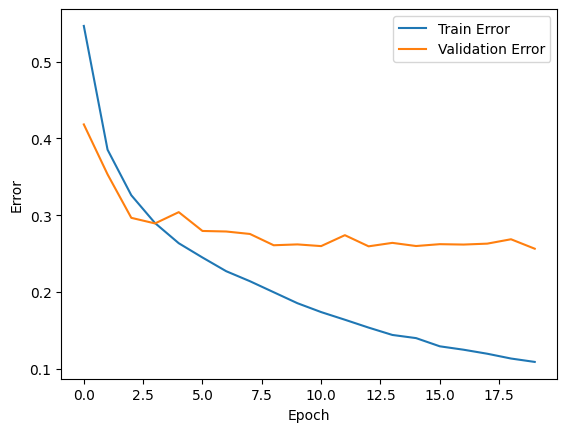

313/313 - 9s - loss: 0.9273 - accuracy: 0.7437 - 9s/epoch - 28ms/step
El valor de error sobre test del modelo final es: 0.2562999725341797
Modelo Convolucional con 1 Dropout [p=0.5]
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_16 (Conv2D)          (None, 15, 15, 64)        18496     
                                                                 
 conv2d_17 (Conv2D)          (None, 15, 15, 64)        36928     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 7, 7, 64)         0         
 2D)

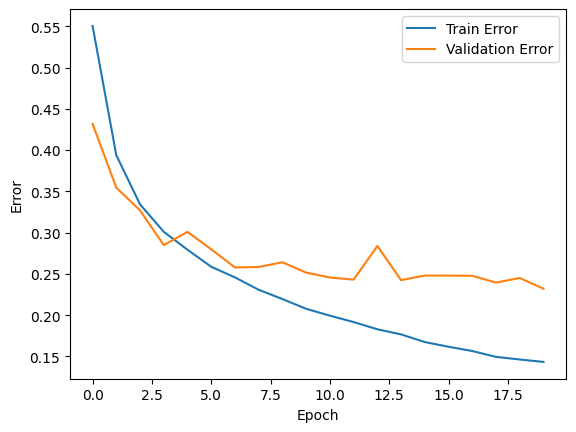

313/313 - 9s - loss: 0.7440 - accuracy: 0.7679 - 9s/epoch - 28ms/step
El valor de error sobre test del modelo final es: 0.2321000099182129


In [ ]:
# Primera versión (con solo 1 dropout)
# Creación de los modelos
for p in [0.2, 0.5]:
  print(f"Modelo Convolucional con 1 Dropout [p={p}]")
  model = models.Sequential()
  model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
  model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
  model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
  model.add(layers.Dropout(p))
  model.add(layers.Flatten())
  model.add(layers.Dense(64))
  model.add(layers.Dense(128))
  model.add(layers.Dense(128))
  model.add(layers.Dense(10))

  model.summary()

  # Compilación y entramiento del modelo
  model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

  epochs = 20
  history = model.fit(train_images, train_labels, epochs=epochs, validation_data=(test_images, test_labels))

  # Evaluación del modelo obtenido
  plt.plot((np.ones(epochs) - history.history['accuracy']), label='Train Error')
  plt.plot((np.ones(epochs) - history.history['val_accuracy']), label = 'Validation Error')
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.legend()
  plt.show()

  _, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

  print(f"El valor de error sobre test del modelo final es: {1 - test_acc}")

Modelo Convolucional con 2 Dropout [p=0.2]
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_21 (Conv2D)          (None, 15, 15, 64)        18496     
                                                                 
 conv2d_22 (Conv2D)          (None, 15, 15, 64)        36928     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_23 

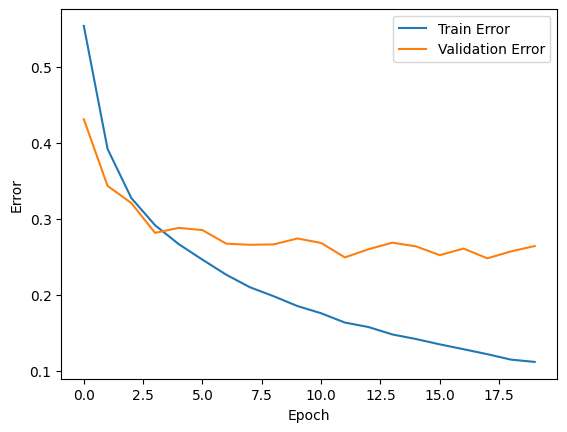

313/313 - 11s - loss: 0.9543 - accuracy: 0.7359 - 11s/epoch - 37ms/step
El valor de error sobre test del modelo final es: 0.26410001516342163
Modelo Convolucional con 2 Dropout [p=0.5]
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_25 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 15, 15, 64)        18496     
                                                                 
 conv2d_27 (Conv2D)          (None, 15, 15, 64)        36928     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 7, 7, 64)         0         
 

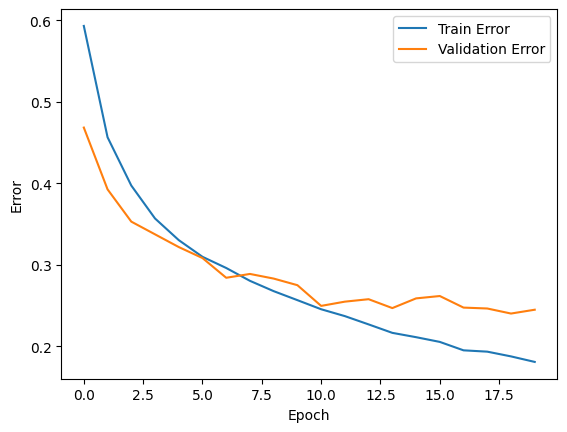

313/313 - 9s - loss: 0.7823 - accuracy: 0.7550 - 9s/epoch - 28ms/step
El valor de error sobre test del modelo final es: 0.24500000476837158


In [ ]:
# Segunda versión (con 2 dropout)
# Creación de los modelos
for p in [0.2, 0.5]:
  print(f"Modelo Convolucional con 2 Dropout [p={p}]")
  model = models.Sequential()
  model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
  model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
  model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
  model.add(layers.Dropout(p))
  model.add(layers.Flatten())
  model.add(layers.Dense(64))
  model.add(layers.Dropout(p))
  model.add(layers.Dense(128))
  model.add(layers.Dense(128))
  model.add(layers.Dense(10))

  model.summary()

  # Compilación y entramiento del modelo
  model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

  epochs = 20
  history = model.fit(train_images, train_labels, epochs=epochs, validation_data=(test_images, test_labels))

  # Evaluación del modelo obtenido
  plt.plot((np.ones(epochs) - history.history['accuracy']), label='Train Error')
  plt.plot((np.ones(epochs) - history.history['val_accuracy']), label = 'Validation Error')
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.legend()
  plt.show()

  _, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

  print(f"El valor de error sobre test del modelo final es: {1 - test_acc}")

El primer punto de comparación es con los resultados del ejercicio 1, vemos que el mismo modelo con cualquier formato de dropout es mejor que sin dropout. También se observa, con un poco de sorpresa en un inicio, que el modelo con un solo dropout luego de la última capa convolucional es mejor (independientemente del valor de `p`) que el modelo que tiene además un segundo dropout luego de la primer capa densa. Pensandolo un poco, me parece que esto es porque si bien las redes convolucionales se benefician del dropout, las capas densas son redes clásicas y por eso un dropout luego de la primer capa densa termina perjudicando.

En cuanto a los gráficos de error, pareciera haber una tendencia a sobreajuste a medida que pasan las épocas  ya que el error de entrenamiento siempre decrece, mientras que el error de validación se estanca al aldedor de ciertos valores. Igualmente en ciertos modelos, como es el modelo con 2 dropouts y `p=0.5`, se ve como las curvas de error se mantienen más cercanas una de otra, por lo cual pienso que estos modelo previenen un poco el sobreentrenamiento.

Por último, vale notar que el modelo con `p=0.5` arroja mejores resultados que el el modelo con `p=0.2`, se podría deducir que mayor probabilidad de dropout beneficia el modelo.  

## Ejercicio 3

Se entrena una red convolucional con el dropout óptimo (una capa de dropout luego de la última capa convolucional y `p=0.5`), agregando como primer capa del modelo una capa de data augmentation. Devuelta, se grafican las curvas de entrenamiento y validación, y el error de test.

170498071/170498071 [==============================] - 4s 0us/step
Modelo Convolucional con Data Augmentation y 1 Dropout [p=0.5]
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip (RandomFlip)    (None, 32, 32, 3)         0         
                                                                 
 random_rotation (RandomRota  (None, 32, 32, 3)        0         
 tion)                                                           
                                                                 
 random_zoom (RandomZoom)    (None, 32, 32, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                        

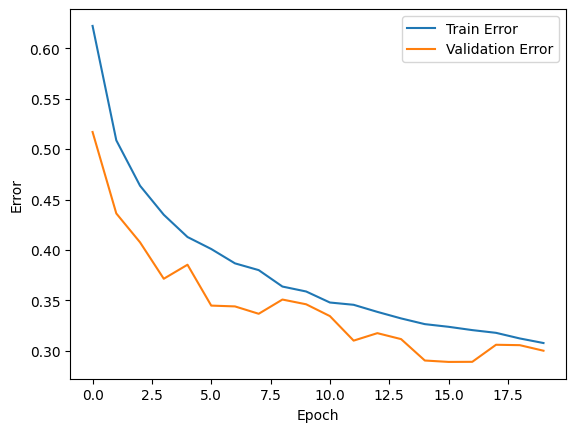

313/313 - 8s - loss: 0.8862 - accuracy: 0.6998 - 8s/epoch - 27ms/step
El valor de error sobre test del modelo final es: 0.3001999855041504


In [ ]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0


# Creación del modelo
p = 0.5
print(f"Modelo Convolucional con Data Augmentation y 1 Dropout [p={p}]")
img_height = 32
img_width = 32
model = models.Sequential()
# Las primeras 3 capas conforman la Data Augmentation
model.add(layers.RandomFlip("horizontal", input_shape=(img_height, img_width, 3)))
model.add(layers.RandomRotation(0.1))
model.add(layers.RandomZoom(0.1))
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.Dropout(p))
model.add(layers.Flatten())
model.add(layers.Dense(64))
model.add(layers.Dense(128))
model.add(layers.Dense(128))
model.add(layers.Dense(10))

model.summary()

# Compilación y entramiento del modelo
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

epochs = 20
history = model.fit(train_images, train_labels, epochs=epochs, validation_data=(test_images, test_labels))

# Evaluación del modelo obtenido
plt.plot((np.ones(epochs) - history.history['accuracy']), label='Train Error')
plt.plot((np.ones(epochs) - history.history['val_accuracy']), label = 'Validation Error')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend()
plt.show()

_, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print(f"El valor de error sobre test del modelo final es: {1 - test_acc}")

El modelo con una capa de data augmentation aumento considerablemente su error de test, comparado con el mismo modelo pero sin la capa de data augmentation agregada.

Por otro lado, viendo el gráfico de errores, vemos que en este caso la curva de error de validación se mantiene siempre por debajo de la curva de error de entrenamiento, cosa que no ocurrió en ningún otro modelo. Con esto se podría confirmar que la regularización a través de data augmentation previene por completo el sobreajuste. Sin embargo, vemos que el error de entrenamiento termino siendo superior a 0.3, lo cual me inclina a pensar que se previene el sobreajuste porque el modelo no está terminando de aprender las features, por estas se ven distorcionadas por esta capa agregada.

## Ejercicio 4

Tomamos el mejor modelo obtenido hasta ahora (con menor error de test final) y realizamos modificaciones sobre las capas para intentar obtener una mejora importante en el error (de al menos 3%).

Epoch 1/20
1563/1563 [==============================] - 284s 180ms/step - loss: 1.5621 - accuracy: 0.4230 - val_loss: 1.3414 - val_accuracy: 0.5296
Epoch 2/20
1563/1563 [==============================] - 291s 186ms/step - loss: 1.1542 - accuracy: 0.5888 - val_loss: 1.0274 - val_accuracy: 0.6403
Epoch 3/20
1563/1563 [==============================] - 283s 181ms/step - loss: 0.9825 - accuracy: 0.6526 - val_loss: 0.9176 - val_accuracy: 0.6711
Epoch 4/20
1563/1563 [==============================] - 283s 181ms/step - loss: 0.8820 - accuracy: 0.6896 - val_loss: 0.8313 - val_accuracy: 0.7082
Epoch 5/20
1563/1563 [==============================] - 294s 188ms/step - loss: 0.8180 - accuracy: 0.7127 - val_loss: 0.8234 - val_accuracy: 0.7098
Epoch 6/20
1563/1563 [==============================] - 292s 187ms/step - loss: 0.7606 - accuracy: 0.7334 - val_loss: 0.7487 - val_accuracy: 0.7377
Epoch 7/20
1563/1563 [==============================] - 291s 186ms/step - loss: 0.7226 - accuracy: 0.7479 - val_

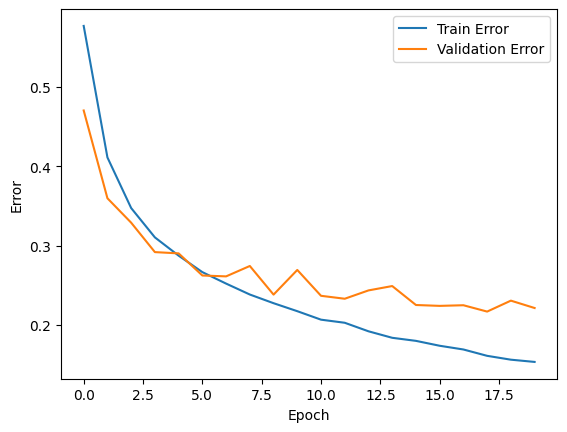

313/313 - 12s - loss: 0.7072 - accuracy: 0.7787 - 12s/epoch - 37ms/step
El valor de error sobre test del modelo final es: 0.22130000591278076


In [3]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Creación de los modelos
p = 0.6
data_augmentation = tf.keras.Sequential([
  layers.RandomContrast(0.2)
])
model = models.Sequential()
model.add(data_augmentation)
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.Dropout(p))
model.add(layers.Flatten())
model.add(layers.Dense(64))
model.add(layers.Dense(128))
model.add(layers.Dense(128))
model.add(layers.Dense(10))


# model.summary()

# Compilación y entramiento del modelo
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

epochs = 20
history = model.fit(train_images, train_labels, epochs=epochs, validation_data=(test_images, test_labels))

# Evaluación del modelo obtenido
plt.plot((np.ones(epochs) - history.history['accuracy']), label='Train Error')
plt.plot((np.ones(epochs) - history.history['val_accuracy']), label = 'Validation Error')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend()
plt.show()

_, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print(f"El valor de error sobre test del modelo final es: {1 - test_acc}")

Luego de probar con al menos 25 modelos distintos, todos partiendo de la red que había dado los mejores resultados hasta ahora y haciendole algunas modificaciones para disminuir un poco más los errores, este fue el más exitoso.

Las modificaciones fueron: agregarle una capa de data augmentation que consistía de una única capa de random contrast con factor 0.2, agregarle un capa convolucional de 32 filtros 3x3 con padding y activación relu, luego de la primer capa convolucioanl de 32 filtros (que ya estaba) y aumentar el valor del argumento de dropout (`p`) de 0.5 a 0.6. Estas modificaciones lograron una mejora de un 1.1% aproximadamente.

Con respecto a porque pienso que estos cambios mejoraron los resultados:
*   Sobre el valor de p, supongo que hay un valor óptimo para cada problema. También probe con 0.7 y no mejoraba los resultados, asi que asumo que en este caso ese p óptimo es mejor aproximado por 0.6 que por 0.5 o 0.7.
*   Sobre la capa de data augmentation, este cambio había dado mejoras en el ejercicio 5 y lo probé en este, donde también dio resultado. Supongo que es un cambio en los datos que ayuda a aprenderlos sin sobreajustar, pero también sin impactar en el resultado.
*   Sobre la capa convolucional agregada no se me ocurre una justificación. Probe con muchas variantes distintas, agregando varias capas convolucionales, variando las cantidades de filtros, agregando también capas de maxpooling, y ninguna combinación de cambios mejoraba los resultados salvo esta.


## Ejercicio 5

Tomamos el modelo del ejercicio 3 (modelo base con un dropout luego de la última capa convolucional con `p=0.5` y la capa de data augmentation agregada, y buscamos mejorar dicha capa de data augmentation, incorporando al menos alguna otra operación.

Modelo Convolucional con Data Augmentation (mejorado) y 1 Dropout [p=0.5]
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_2 (Sequential)   (None, 32, 32, 3)         0         
                                                                 
 conv2d_5 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 15, 15, 64)        18496     
                                                                 
 conv2d_7 (Conv2D)           (None, 15, 15, 64)        36928     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 64)

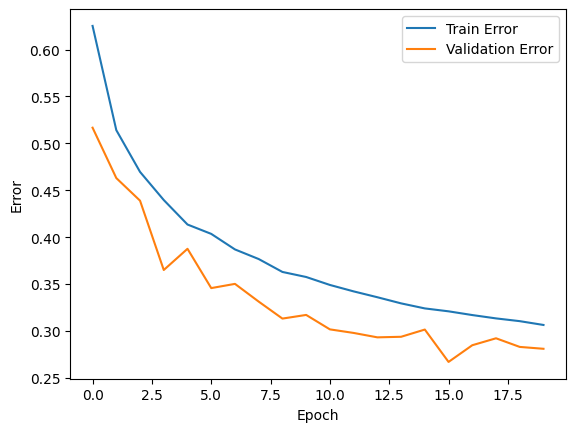

313/313 - 10s - loss: 0.8194 - accuracy: 0.7190 - 10s/epoch - 33ms/step
El valor de error sobre test del modelo final es: 0.281000018119812


In [ ]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0


# Creación del modelo
p = 0.5
print(f"Modelo Convolucional con Data Augmentation (mejorado) y 1 Dropout [p={p}]")
img_height = 32
img_width = 32
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal", input_shape=(img_height, img_width, 3)),
  layers.RandomRotation(0.1),
  layers.RandomZoom(0.1),
  layers.RandomContrast(0.2)
])
model = models.Sequential()
model.add(data_augmentation)
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.Dropout(p))
model.add(layers.Flatten())
model.add(layers.Dense(64))
model.add(layers.Dense(128))
model.add(layers.Dense(128))
model.add(layers.Dense(10))

model.summary()

# Compilación y entramiento del modelo
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

epochs = 20
history = model.fit(train_images, train_labels, epochs=epochs, validation_data=(test_images, test_labels))

# Evaluación del modelo obtenido
plt.plot((np.ones(epochs) - history.history['accuracy']), label='Train Error')
plt.plot((np.ones(epochs) - history.history['val_accuracy']), label = 'Validation Error')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend()
plt.show()

_, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print(f"El valor de error sobre test del modelo final es: {1 - test_acc}")

Agregamos al final de la capa de data augmentation la capa `layers.RandomContrast(0.2)`, que ajusta el constraste de las imagenes durante el entrenamiento de forma aleatorea de acuerdo al factor que se le pasa, en este caso `0.2`. El modelo final obtenido mejora el error de test en un 2%, lo cual me resulta bastante significativo para el poco cambio que se le realizó al modelo. Esta mejora creo que es porque esta nueva capa modifica los datos de forma lo suficientemente sutíl como para que ayude al modelo a aprender los features, sin agregarle carga.